1: Calculate the mean of each feature and center the data. For the sake of testing, display the mean and
a few centered images:

/Users/siyuwu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


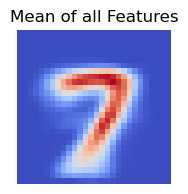

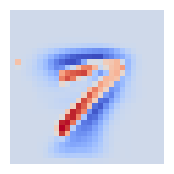

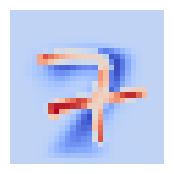

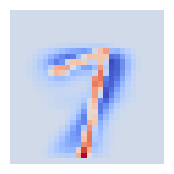

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('./image_data.csv')

# Fix column names
data.columns = [f'pixel_{i}' for i in range(784)]

# Calculate the mean of each feature
feature_means = data.mean()

# Center the data by subtracting the mean of each feature from each observation
centered_data = data - feature_means

# Function to display a single MNIST image
def display_image(data, index):
    plt.figure(figsize=(2,2))
    image = data.iloc[index].values.reshape(28,28)
    plt.imshow(image, cmap='coolwarm')
    plt.axis('off')
    plt.show()

# Reshape the mean of the features to the 28x28 image format and display it as an image
mean_image = feature_means.values.reshape(28,28)

plt.figure(figsize=(2,2))
plt.imshow(mean_image, cmap='coolwarm')
plt.axis('off')
plt.title("Mean of all Features")
plt.show()

# Display the first few centered images
for i in range(3):
    display_image(centered_data, i)


Calculate the covariance matrix of the features (i.e., N1 XT X, where X is the data matrix and N is the number of data), calculate the eigenvalues and eigenvectors of the covariance matrix, and display a couple of the highest eigenvalues and the corresponding eigenvectors:

In [2]:
from numpy.linalg import eigh

Highest Eigenvalues: [6.54932159 4.56353076]


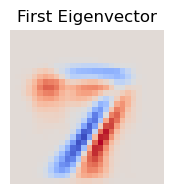

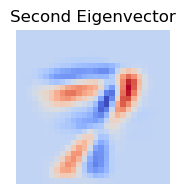

In [3]:
# Calculate the covariance matrix
cov_matrix = np.cov(centered_data.T)

# Calculate eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = eigh(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Extract the two highest eigenvalues and their corresponding eigenvectors
highest_eigenvalues = sorted_eigenvalues[:2]
corresponding_eigenvectors = sorted_eigenvectors[:, :2]

# Print the highest eigenvalues
print("Highest Eigenvalues:", highest_eigenvalues)


# Function to display eigenvectors as images
def display_eigenvector_as_image(eigenvector, title):
    plt.figure(figsize=(2,2))
    image = eigenvector.reshape(28,28)
    plt.imshow(image, cmap='coolwarm')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Display the first two principal eigenvectors as images
display_eigenvector_as_image(sorted_eigenvectors[:, 0], "First Eigenvector")
display_eigenvector_as_image(sorted_eigenvectors[:, 1], "Second Eigenvector")


Project each image x to a 25-dimensional representation z = xV T using the eigenvectors of the 25 highest eigenvalues (make sure that the eigenvectors are normalized, i.e., vT v = 1 for every eigenvector v). Print out the 25-dimensional representations of a few images.

In [4]:
# Normalize the sorted eigenvectors to ensure each is of unit length (vT v = 1)
normalized_eigenvectors = sorted_eigenvectors / np.linalg.norm(sorted_eigenvectors, axis=0)

# Use the 25 eigenvectors corresponding to the 25 highest eigenvalues
V = normalized_eigenvectors[:, :25]

# Project each image to the 25-dimensional space
Z = np.dot(centered_data, V)

# Print out the 25-dimensional representations of the first few images
print(Z[:3])

[[-1.03136527  0.35326307  4.01789278 -0.27050322  0.59971823  1.55447652
   0.2552432   0.10232433 -0.19182115  2.97658169 -0.82979264 -0.52570768
   0.20050516  0.28039968  0.26677761  0.18271454  0.89525454 -0.21332124
  -0.77339384 -0.74364718 -0.91515695  0.21270614  0.02733942  0.11974364
  -0.18001764]
 [ 0.78079059 -3.33386314  0.74446257  1.37104463  1.25322514 -0.66703559
  -0.79573746  0.46595839  0.76079171 -0.70082282 -2.24109946  0.98100613
   0.03296597  0.30013884 -1.21397938 -0.08352247 -0.11144206 -0.25859501
  -0.06444977  0.11301512 -1.43553206  0.03709865 -1.23311407 -0.50975447
  -0.63685209]
 [ 0.18439129 -2.34851269  1.32231903 -1.33988419 -1.23793722  1.17582102
   1.57018091  1.97747768  0.21323937 -0.99741949  0.78197579  0.06079915
   0.16139374  0.03203509  0.44460467  0.36329856 -0.32011187 -0.30028009
   0.82557877 -0.00838552  0.12369397 -0.32791118 -0.07301005  0.33084265
  -0.16480031]]


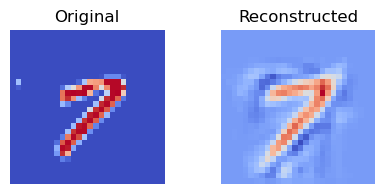

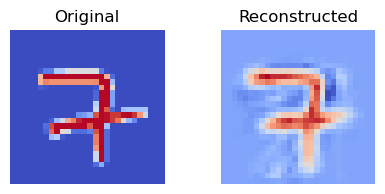

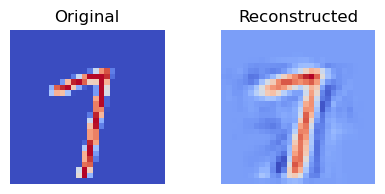

In [5]:
# Reconstruct images from the 25-dimensional representation
reconstructed_images = np.dot(Z, V.T)

# Add the mean back to the reconstructed images to undo centering
reconstructed_images += feature_means.values

# Function to display original and reconstructed images side by side
def display_comparison(original_data, reconstructed_data, index):
    original_image = original_data.iloc[index].values.reshape(28,28)
    reconstructed_image = reconstructed_data[index].reshape(28,28)
    
    plt.figure(figsize=(5,2))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='coolwarm')
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image, cmap='coolwarm')
    plt.title("Reconstructed")
    plt.axis('off')
    
    plt.show()

# Display comparison of original and reconstructed images for the first few images
for i in range(3):
    display_comparison(data, reconstructed_images, i)

Problem 1.2: We have learned of another way of calculating principal components, based on the data TT2
covariance matrix X X (instead of the feature covariance matrix X X ).

!!Write a discussion of which of the two methods is more efficient for this dataset, arguing in favor ofthe more efficient one
The 1.1 approach calculates the covariance matrix of features.
The 1.2 approach calculates the covariance matrix of observations.
For example, if interested in analyzing relationships between features or identifying principal components, may prefer the first approach. On the other hand, if interested in analyzing relationships between observations or performing PCA directly on the data matrix, may prefer the second approach.
Also, in some cases, especially when dealing with high-dimensional data or when the number of observations is much larger than the number of features, it can be computationally advantageous to compute the covariance matrix of the data matrix instead. And in this problem is this case, so the 1.2 approach is betterh than 1.1

2: Calculate the covariance matrix XXT of the data, calculate the eigenvalues and eigenvectors of the covariance matrix, select the eigenvectors of the 25 highest eigenvalues, and calculate the principal components by multiplying each eigenvector to the data matrix (i.e., v = uX) and normalizing the resulting vector (i.e., ensuring vT v = 1).

In [6]:
# Calculate the covariance matrix XXT of the data
cov_matrix_data = np.dot(centered_data.values, centered_data.values.T)

# Calculate eigenvalues and eigenvectors of the covariance matrix XXT
eigenvalues_data, eigenvectors_data = eigh(cov_matrix_data)

# Sort the eigenvalues and eigenvectors in descending order
sorted_indices_data = np.argsort(eigenvalues_data)[::-1]
sorted_eigenvalues_data = eigenvalues_data[sorted_indices_data]
sorted_eigenvectors_data = eigenvectors_data[:, sorted_indices_data]

# Select the eigenvectors corresponding to the 25 highest eigenvalues
top_eigenvectors_data = sorted_eigenvectors_data[:, :25]

# Calculate the principal components by multiplying each selected eigenvector to the data matrix
principal_components = np.dot(top_eigenvectors_data.T, centered_data.values)

# Normalize the resulting vectors to ensure vT v = 1
normalized_principal_components = principal_components / np.linalg.norm(principal_components, axis=1)[:, np.newaxis]

# Display the shape of the normalized principal components to confirm the process
normalized_principal_components.shape

(25, 784)

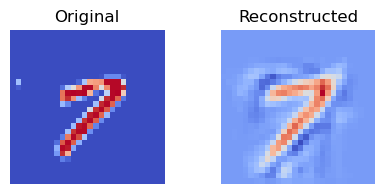

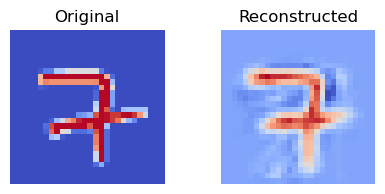

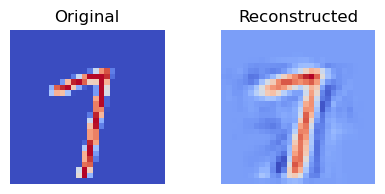

In [7]:
# Project each image x to a 25-dimensional representation z using the 25 principal components
Z_new = np.dot(centered_data.values, normalized_principal_components.T)

# Reconstruct each image from its 25-dimensional representation
reconstructed_images_new = np.dot(Z_new, normalized_principal_components)

# Add the mean back to undo the centering
reconstructed_images_new += feature_means.values

# Display comparison of original and reconstructed images for the first few images using the new method
for i in range(3):
    display_comparison(data, reconstructed_images_new, i)


!!Compare these reconstructions to the ones from Problem 1.1 and write a brief discussion of what you found.

Despite the differences in the perspective from which the covariance matrix is calculated, the principal components obtained from PCA are mathematically equivalent. This is because the principal components are determined by the eigenvectors of the covariance matrix, and the eigenvectors are invariant to whether the covariance matrix is calculated from transposed data or the data itself.

Therefore, the reconstructed images obtained through PCA using these two approaches are the same because they are based on the same principal components, which capture the essential information of the dataset.

Problem 2.1: Apply a linear autoencoder to this dataset:
Create an encoder fe(x) that consists of only linear operations and has a 25-dimensional output; create a decoder fd(z) that has a 25-dimensional input and consists of only linear operations

In [8]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms
import pandas as pd
import numpy as np

# Load and preprocess the data
data = pd.read_csv('./image_data.csv')
data.columns = [f'pixel_{i}' for i in range(784)]
feature_means = data.mean()
centered_data = data - feature_means

# Convert the centered data to PyTorch tensors
tensor_data = torch.tensor(centered_data.values.astype(np.float32))

# Create a dataset and dataloader for training
dataset = TensorDataset(tensor_data, tensor_data) # input and target are the same
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

# Define the encoder
class Encoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Encoder, self).__init__()
        self.linear = nn.Linear(input_dim, encoding_dim)
        
    def forward(self, x):
        return self.linear(x)
    
# Define the decoder
class Decoder(nn.Module):
    def __init__(self, encoding_dim, output_dim):
        super(Decoder, self).__init__()
        self.linear = nn.Linear(encoding_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
    
# Define the autoencoder
class LinearAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(LinearAutoencoder, self).__init__()
        self.encoder = Encoder(input_dim, encoding_dim)
        self.decoder = Decoder(encoding_dim, input_dim)
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the autoencoder
input_dim = 784
encoding_dim = 25
autoencoder = LinearAutoencoder(input_dim, encoding_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)

# Training the autoencoder
num_epochs = 50
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, targets = data
        # Forward pass
        outputs = autoencoder(inputs)
        loss = torch.sqrt(nn.MSELoss()(outputs, targets)) # Calculating RMSE
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


/Users/siyuwu/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/siyuwu/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 6): Symbol not found: __ZN3c106detail19maybe_wrap_dim_slowIxEET_S2_S2_b
  Referenced from: /Users/siyuwu/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in: /Users/siyuwu/anaconda3/lib/python3.11/site-packages/torch/lib/libc10.dylib
 in /Users/siyuwu/anaconda3/lib/python3.11/site-packages/torchvision/image.so'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Epoch [1/50], Loss: 0.2551
Epoch [2/50], Loss: 0.2512
Epoch [3/50], Loss: 0.2511
Epoch [4/50], Loss: 0.2473
Epoch [5/50], Loss: 0.2395
Epoch [6/50], Loss: 0.2414
Epoch [7/50], Loss: 0.2387
Epoch [8/50], Loss: 0.2405
Epoch [9/50], Loss: 0.2330
Epoch [10/50], Loss: 0.2289
Epoch [11/50], Loss: 0.2365
Epoch [12/50], Loss: 0.2289
Epoch [13/50], Loss: 0.2295
Epoch [14/50], Loss: 0.2289
Epoch [15/50], Loss: 0.2190
Epoch [16/50], Loss: 0.2211
Epoch [17/50], Loss: 0.2188
Epoch [18/50], Loss: 0.2155
Epoch [19/50], Loss: 0.2124
Epoch [20/50], Loss: 0.2106
Epoch [21/50], Loss: 0.2044
Epoch [22/50], Loss: 0.2065
Epoch [23/50], Loss: 0.2040
Epoch [24/50], Loss: 0.1980
Epoch [25/50], Loss: 0.1930
Epoch [26/50], Loss: 0.1900
Epoch [27/50], Loss: 0.1941
Epoch [28/50], Loss: 0.1847
Epoch [29/50], Loss: 0.1841
Epoch [30/50], Loss: 0.1857
Epoch [31/50], Loss: 0.1844
Epoch [32/50], Loss: 0.1813
Epoch [33/50], Loss: 0.1817
Epoch [34/50], Loss: 0.1775
Epoch [35/50], Loss: 0.1771
Epoch [36/50], Loss: 0.1733
E

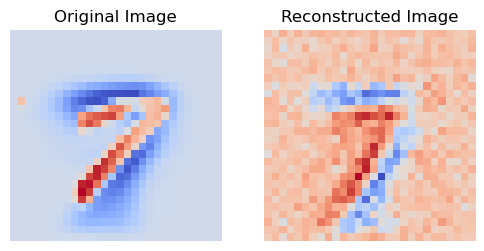

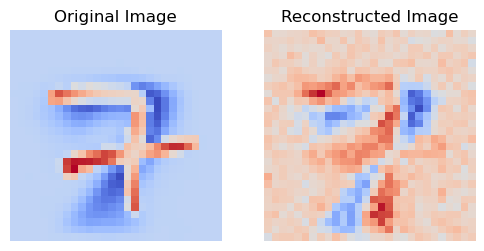

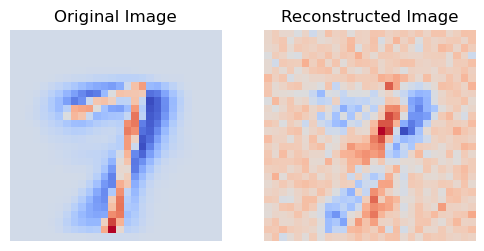

In [9]:
# Assuming autoencoder is the trained model from the previous steps

# Function to map images to 25-dimensional representations using the encoder
def encode_images(encoder, data_loader):
    encoded_images = []
    with torch.no_grad():  # Inference mode, no need to compute gradients
        for inputs, _ in data_loader:
            encoded = encoder(inputs)
            encoded_images.append(encoded)
    encoded_images = torch.cat(encoded_images, dim=0)  # Combine batches
    return encoded_images

# Function to reconstruct images from 25-dimensional representations using the decoder
def decode_images(decoder, encoded_images):
    reconstructed_images = []
    with torch.no_grad():  # Inference mode
        for encoded in DataLoader(encoded_images, batch_size=256):
            reconstructed = decoder(encoded)
            reconstructed_images.append(reconstructed)
    reconstructed_images = torch.cat(reconstructed_images, dim=0)  # Combine batches
    return reconstructed_images

# Create DataLoader for the entire dataset (for encoding)
full_data_loader = DataLoader(dataset, batch_size=256, shuffle=False)

# Map each image to a 25-dimensional representation z using the trained encoder
z = encode_images(autoencoder.encoder, full_data_loader)

# Reconstruct each image from its representation z using the trained decoder
reconstructed_x = decode_images(autoencoder.decoder, z)

# Optionally, convert reconstructed images to numpy for visualization or further processing
reconstructed_x_np = reconstructed_x.numpy()

# Visualization of original vs reconstructed images (example for the first image)
import matplotlib.pyplot as plt

def show_images(original, reconstructed, index):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(original[index].reshape(28, 28), cmap='coolwarm')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed[index].reshape(28, 28), cmap='coolwarm')
    plt.title("Reconstructed Image")
    plt.axis('off')

    plt.show()

# Visualization of original vs reconstructed images for the first three images
for i in range(3):
    show_images(tensor_data, reconstructed_x_np, i)


!!Compare these reconstructions to the ones from Problem 1.1 and write a discussion of your findings.

This is not a good reconstruction result compared to PCA. linear autoencoders and PCA are different techniques for dimensionality reduction, and in this problem set, PCA is better than linear autoencoders. Linear autoencoders are neural network models trained to minimize reconstruction error. While they also perform dimensionality reduction, in this case, it's not be as effective as PCA in capturing the most informative features of the data. also linear may be problematic itself, If the underlying data structure is highly non-linear, linear autoencoders may not be able to capture it effectively. PCA, although linear, is specifically designed to capture the directions of maximum variance in the data, which can still be effective even if the relationships are non-linear.

Apply a non-linear autoencoder to this dataset:
1. Create an encoder fe(x) that consists of both linear operations and non-linear activation functions,
and has a 25-dimensional output; similarly, create a decoder fd(z) that has a 25-dimensional input, and consists of both linear operations and non-linear activation functions
2.train your encoder and decoder on the dataset, minimizing RMSE (i.e., ∥x − fd(fe(x))∥2).
3. Again, map each image x to a 25-dimensional representation z using the trained encoder and recon- struct each image x ̃ from its representation z using the trained decoder

In [10]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np

# Assuming data is already loaded and preprocessed from previous steps

# Convert the centered data to PyTorch tensors
tensor_data = torch.tensor(centered_data.values.astype(np.float32))

# Create a dataset and dataloader for training
dataset = TensorDataset(tensor_data, tensor_data) # input and target are the same
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

# Define the non-linear autoencoder model as before
class NonLinearAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(NonLinearAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),  # Linear layer 1
            nn.ReLU(),                   # ReLU activation function
            nn.Linear(128, 64),          # Linear layer 2
            nn.ReLU(),                   # ReLU activation function
            nn.Linear(64, encoding_dim)  # Final linear layer for encoding
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64), # Linear layer 1
            nn.ReLU(),                   # ReLU activation function
            nn.Linear(64, 128),          # Linear layer 2
            nn.ReLU(),                   # ReLU activation function
            nn.Linear(128, input_dim)    # Final linear layer for decoding
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the non-linear autoencoder
input_dim = 784
encoding_dim = 25
non_linear_autoencoder = NonLinearAutoencoder(input_dim, encoding_dim)

# Define the RMSE loss function
def rmse_loss(y_pred, y_true):
    mse = nn.MSELoss()
    return torch.sqrt(mse(y_pred, y_true))

# Define the optimizer
optimizer = torch.optim.Adam(non_linear_autoencoder.parameters(), lr=1e-3)

# Training loop with RMSE loss
num_epochs = 50
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        # Forward pass
        outputs = non_linear_autoencoder(inputs)
        loss = rmse_loss(outputs, targets) # Using RMSE loss
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Function to map images to 25-dimensional representations using the encoder
def encode_images(encoder, data_loader):
    encoded_images = []
    with torch.no_grad():  # Inference mode, no need to compute gradients
        for inputs, _ in data_loader:
            encoded = encoder(inputs)
            encoded_images.append(encoded)
    encoded_images = torch.cat(encoded_images, dim=0)  # Combine batches
    return encoded_images

# Function to reconstruct images from 25-dimensional representations using the decoder
def decode_images(decoder, encoded_images):
    reconstructed_images = []
    with torch.no_grad():  # Inference mode
        for encoded in DataLoader(encoded_images, batch_size=256):
            reconstructed = decoder(encoded)
            reconstructed_images.append(reconstructed)
    reconstructed_images = torch.cat(reconstructed_images, dim=0)  # Combine batches
    return reconstructed_images

# Map each image to a 25-dimensional representation z using the trained encoder
z = encode_images(non_linear_autoencoder.encoder, dataloader)

# Reconstruct each image from its representation z using the trained decoder
reconstructed_y = decode_images(non_linear_autoencoder.decoder, z)


Epoch [1/50], Loss: 0.2272
Epoch [2/50], Loss: 0.2227
Epoch [3/50], Loss: 0.2218
Epoch [4/50], Loss: 0.2189
Epoch [5/50], Loss: 0.2157
Epoch [6/50], Loss: 0.2188
Epoch [7/50], Loss: 0.2157
Epoch [8/50], Loss: 0.2141
Epoch [9/50], Loss: 0.2128
Epoch [10/50], Loss: 0.2114
Epoch [11/50], Loss: 0.2111
Epoch [12/50], Loss: 0.2031
Epoch [13/50], Loss: 0.1998
Epoch [14/50], Loss: 0.1969
Epoch [15/50], Loss: 0.1898
Epoch [16/50], Loss: 0.1895
Epoch [17/50], Loss: 0.1852
Epoch [18/50], Loss: 0.1839
Epoch [19/50], Loss: 0.1810
Epoch [20/50], Loss: 0.1792
Epoch [21/50], Loss: 0.1758
Epoch [22/50], Loss: 0.1667
Epoch [23/50], Loss: 0.1730
Epoch [24/50], Loss: 0.1702
Epoch [25/50], Loss: 0.1679
Epoch [26/50], Loss: 0.1611
Epoch [27/50], Loss: 0.1605
Epoch [28/50], Loss: 0.1620
Epoch [29/50], Loss: 0.1603
Epoch [30/50], Loss: 0.1571
Epoch [31/50], Loss: 0.1476
Epoch [32/50], Loss: 0.1565
Epoch [33/50], Loss: 0.1509
Epoch [34/50], Loss: 0.1492
Epoch [35/50], Loss: 0.1521
Epoch [36/50], Loss: 0.1477
E

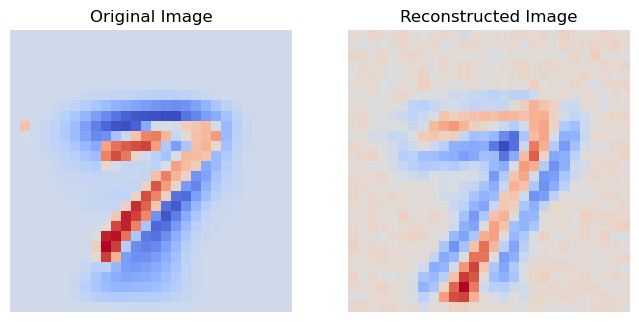

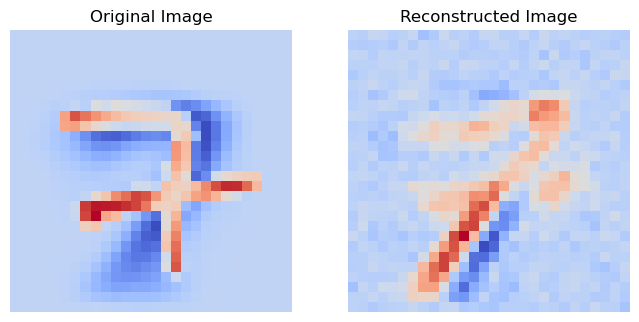

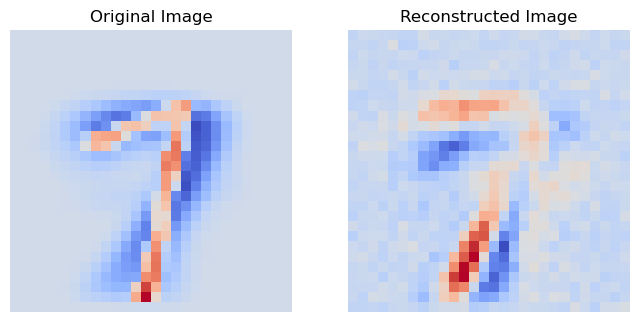

In [11]:
import matplotlib.pyplot as plt

# Function to display original and reconstructed images
def show_images(original, reconstructed, index):
    original_image = original[index].reshape(28, 28)
    reconstructed_image = reconstructed[index].reshape(28, 28)
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='coolwarm')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image, cmap='coolwarm')
    plt.title("Reconstructed Image")
    plt.axis('off')

    plt.show()

# Display original and reconstructed images for the first three images in the dataset using the non-linear autoencoder
# Reconstruct each image from its representation z using the trained decoder for the non-linear autoencoder

# Display original and reconstructed images for the first three images in the dataset using the non-linear autoencoder
for i in range(3):
    show_images(tensor_data, reconstructed_y, i)


!!Compare these reconstructions to the ones from Problem 2.1 and write a discussion of your findings. Make sure that your non-linear autoencoder provides better results than the linear one.

It get improved compared to linear autodecoder, due to the reason that it can capture non-linear data structures. But, still not as good as PCA, one way to improve may adding more layers or unit to make the architecure more sophisticated. Overall, the performance of PCA > non-linear autoencoder > linear autoencoder.

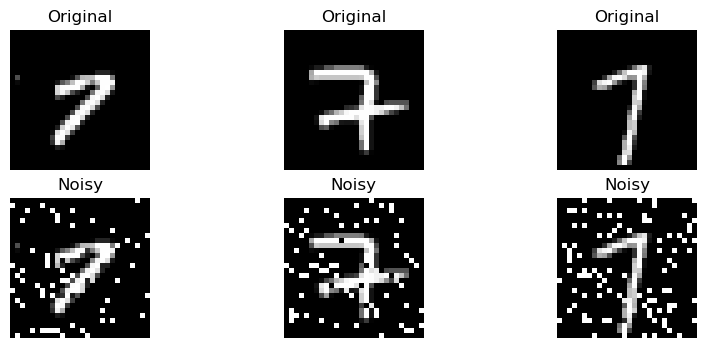

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def add_noise_to_images(images, noise_level=0.1):
    """
    Adds noise to the images by flipping each pixel with a specified probability (noise_level).
    Flipping changes a pixel's value from x to 1-x.
    
    Parameters:
        images (np.array): A 2D array where each row is a flattened image.
        noise_level (float): Probability of flipping each pixel.
        
    Returns:
        np.array: Noisy images.
    """
    random_flips = np.random.rand(*images.shape) < noise_level
    noisy_images = np.where(random_flips, 1-images, images)
    return noisy_images

def display_images(original, noisy, num_examples=3):
    """
    Displays a comparison of original and noisy images.
    
    Parameters:
        original (np.array): Original images.
        noisy (np.array): Noisy images.
        num_examples (int): Number of examples to display.
    """
    plt.figure(figsize=(10, 4))
    for i in range(num_examples):
        plt.subplot(2, num_examples, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')
        
        plt.subplot(2, num_examples, num_examples + i + 1)
        plt.imshow(noisy[i].reshape(28, 28), cmap='gray')
        plt.title("Noisy")
        plt.axis('off')
    plt.show()



# Load the image data
image_data_path = './image_data.csv'  # Update this path
image_data = pd.read_csv(image_data_path)

# Convert the DataFrame to a numpy array
images = image_data.to_numpy()

# Generate noisy images
noisy_images = add_noise_to_images(images, noise_level=0.1)

# Display some of the images
display_images(images, noisy_images)


noisy_images_path = './noisy_images.csv'  # Update this path

pd.DataFrame(noisy_images).to_csv(noisy_images_path, index=False)


In [23]:
# Load the data
noise_data = pd.read_csv('./noisy_images.csv')

# Fix column names
noise_data.columns = [f'pixel_{i}' for i in range(784)]

# Calculate the mean of each feature
noise_feature_means = noise_data.mean()

# Center the data by subtracting the mean of each feature from each observation
noise_centered_data = noise_data - noise_feature_means

In [24]:
# Convert the centered data to PyTorch tensors
noise_tensor_data = torch.tensor(noise_centered_data.values.astype(np.float32))

# Create a dataset and dataloader for training
noise_dataset = TensorDataset(noise_tensor_data, noise_tensor_data) # input and target are the same
noise_dataloader = DataLoader(noise_dataset, batch_size=256, shuffle=True)


In [26]:
#use the previous model without training.
# Function to map images to 25-dimensional representations using the encoder
def encode_images(encoder, data_loader):
    encoded_images = []
    with torch.no_grad():  # Inference mode, no need to compute gradients
        for inputs, _ in data_loader:
            encoded = encoder(inputs)
            encoded_images.append(encoded)
    encoded_images = torch.cat(encoded_images, dim=0)  # Combine batches
    return encoded_images

# Function to reconstruct images from 25-dimensional representations using the decoder
def decode_images(decoder, encoded_images):
    reconstructed_images = []
    with torch.no_grad():  # Inference mode
        for encoded in DataLoader(encoded_images, batch_size=256):
            reconstructed = decoder(encoded)
            reconstructed_images.append(reconstructed)
    reconstructed_images = torch.cat(reconstructed_images, dim=0)  # Combine batches
    return reconstructed_images

# Map each image to a 25-dimensional representation z using the trained encoder
z = encode_images(non_linear_autoencoder.encoder, noise_dataloader)

# Reconstruct each image from its representation z using the trained decoder
reconstructed_y = decode_images(non_linear_autoencoder.decoder, z)

In [49]:
import matplotlib.pyplot as plt

# Function to display original and reconstructed images
def show_images(original, reconstructed, index):
    original_image = original[index].reshape(28, 28)
    reconstructed_image = reconstructed[index].reshape(28, 28)
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='coolwarm')
    plt.title("noise Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image, cmap='coolwarm')
    plt.title("Reconstructed Image")
    plt.axis('off')

    plt.show()

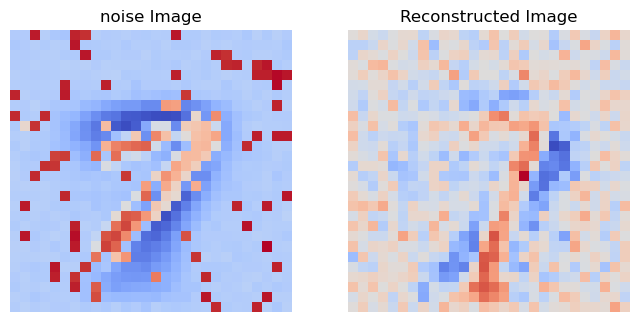

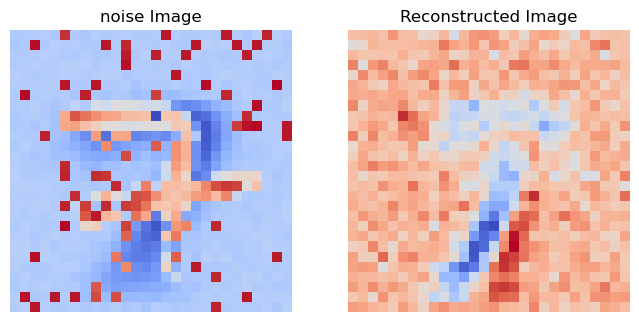

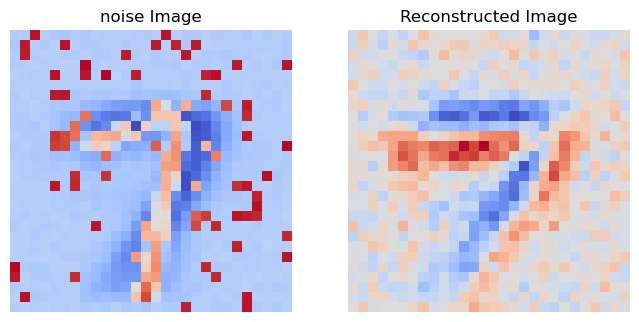

In [50]:
for i in range(3):
    show_images(noise_tensor_data, reconstructed_y, i)

In [52]:
#train the previous non linear autoencoder use noise data
# Define the non-linear autoencoder model as before
class NonLinearAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(NonLinearAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),  # Linear layer 1
            nn.ReLU(),                   # ReLU activation function
            nn.Linear(128, 64),          # Linear layer 2
            nn.ReLU(),                   # ReLU activation function
            nn.Linear(64, encoding_dim)  # Final linear layer for encoding
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 64), # Linear layer 1
            nn.ReLU(),                   # ReLU activation function
            nn.Linear(64, 128),          # Linear layer 2
            nn.ReLU(),                   # ReLU activation function
            nn.Linear(128, input_dim)    # Final linear layer for decoding
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the non-linear autoencoder
input_dim = 784
encoding_dim = 25
non_linear_autoencoder = NonLinearAutoencoder(input_dim, encoding_dim)

# Define the RMSE loss function
def rmse_loss(y_pred, y_true):
    mse = nn.MSELoss()
    return torch.sqrt(mse(y_pred, y_true))

# Define the optimizer
optimizer = torch.optim.Adam(non_linear_autoencoder.parameters(), lr=1e-3)

# Training loop with RMSE loss
num_epochs = 50
for epoch in range(num_epochs):
    for inputs, targets in noise_dataloader:
        # Forward pass
        outputs = non_linear_autoencoder(inputs)
        loss = rmse_loss(outputs, targets) # Using RMSE loss
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Function to map images to 25-dimensional representations using the encoder
def encode_images(encoder, data_loader):
    encoded_images = []
    with torch.no_grad():  # Inference mode, no need to compute gradients
        for inputs, _ in data_loader:
            encoded = encoder(inputs)
            encoded_images.append(encoded)
    encoded_images = torch.cat(encoded_images, dim=0)  # Combine batches
    return encoded_images

# Function to reconstruct images from 25-dimensional representations using the decoder
def decode_images(decoder, encoded_images):
    reconstructed_images = []
    with torch.no_grad():  # Inference mode
        for encoded in DataLoader(encoded_images, batch_size=256):
            reconstructed = decoder(encoded)
            reconstructed_images.append(reconstructed)
    reconstructed_images = torch.cat(reconstructed_images, dim=0)  # Combine batches
    return reconstructed_images

# Map each image to a 25-dimensional representation z using the trained encoder
z = encode_images(non_linear_autoencoder.encoder, noise_dataloader)

# Reconstruct each image from its representation z using the trained decoder
reconstructed_y = decode_images(non_linear_autoencoder.decoder, z)


Epoch [1/50], Loss: 0.3423
Epoch [2/50], Loss: 0.3420
Epoch [3/50], Loss: 0.3406
Epoch [4/50], Loss: 0.3414
Epoch [5/50], Loss: 0.3392
Epoch [6/50], Loss: 0.3361
Epoch [7/50], Loss: 0.3376
Epoch [8/50], Loss: 0.3357
Epoch [9/50], Loss: 0.3349
Epoch [10/50], Loss: 0.3322
Epoch [11/50], Loss: 0.3332
Epoch [12/50], Loss: 0.3329
Epoch [13/50], Loss: 0.3310
Epoch [14/50], Loss: 0.3264
Epoch [15/50], Loss: 0.3279
Epoch [16/50], Loss: 0.3254
Epoch [17/50], Loss: 0.3208
Epoch [18/50], Loss: 0.3222
Epoch [19/50], Loss: 0.3194
Epoch [20/50], Loss: 0.3204
Epoch [21/50], Loss: 0.3175
Epoch [22/50], Loss: 0.3179
Epoch [23/50], Loss: 0.3189
Epoch [24/50], Loss: 0.3166
Epoch [25/50], Loss: 0.3159
Epoch [26/50], Loss: 0.3172
Epoch [27/50], Loss: 0.3124
Epoch [28/50], Loss: 0.3121
Epoch [29/50], Loss: 0.3136
Epoch [30/50], Loss: 0.3116
Epoch [31/50], Loss: 0.3103
Epoch [32/50], Loss: 0.3080
Epoch [33/50], Loss: 0.3090
Epoch [34/50], Loss: 0.3085
Epoch [35/50], Loss: 0.3056
Epoch [36/50], Loss: 0.3049
E

In [53]:
#use the previous model with training using noise data.
# Function to map images to 25-dimensional representations using the encoder
def encode_images(encoder, data_loader):
    encoded_images = []
    with torch.no_grad():  # Inference mode, no need to compute gradients
        for inputs, _ in data_loader:
            encoded = encoder(inputs)
            encoded_images.append(encoded)
    encoded_images = torch.cat(encoded_images, dim=0)  # Combine batches
    return encoded_images

# Function to reconstruct images from 25-dimensional representations using the decoder
def decode_images(decoder, encoded_images):
    reconstructed_images = []
    with torch.no_grad():  # Inference mode
        for encoded in DataLoader(encoded_images, batch_size=256):
            reconstructed = decoder(encoded)
            reconstructed_images.append(reconstructed)
    reconstructed_images = torch.cat(reconstructed_images, dim=0)  # Combine batches
    return reconstructed_images

# Map each image to a 25-dimensional representation z using the trained encoder
z = encode_images(non_linear_autoencoder.encoder, noise_dataloader)

# Reconstruct each image from its representation z using the trained decoder
reconstructed_y = decode_images(non_linear_autoencoder.decoder, z)

In [54]:
import matplotlib.pyplot as plt

# Function to display original and reconstructed images
def show_images(original, reconstructed, index):
    original_image = original[index].reshape(28, 28)
    reconstructed_image = reconstructed[index].reshape(28, 28)
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='coolwarm')
    plt.title("Noise Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image, cmap='coolwarm')
    plt.title("Reconstructed Image")
    plt.axis('off')

    plt.show()

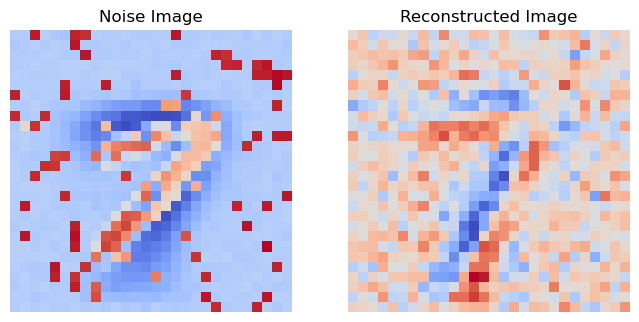

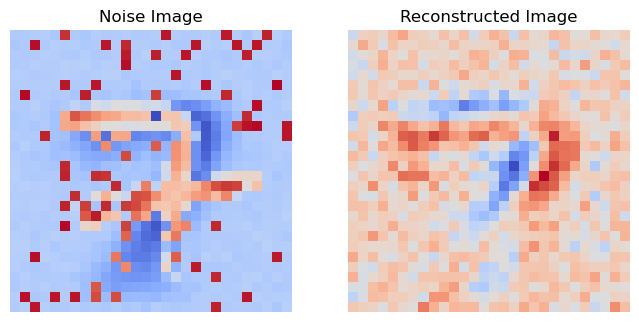

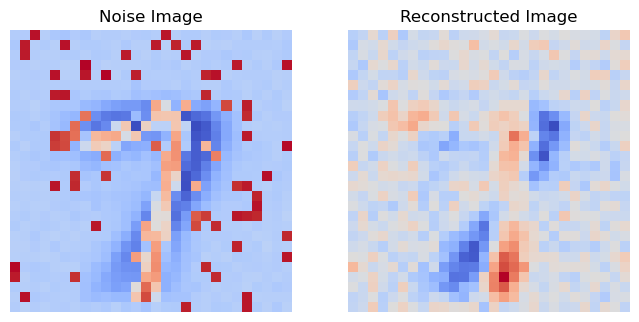

In [55]:
for i in range(3):
    show_images(noise_tensor_data, reconstructed_y, i)

I first recap what i have done first I created the noise image, then I reconstruct the image from noise image using previous trained non linear autoencoder (trianed use clean image), last i trained the autoencoder using the noise image and reconstruct the noise image using the newly trained model. for first discussion, tt is showed that when use an autoencoder trained on clean images to reconstruct noisy images, the performance will be suboptimal. The autoencoder has learned the representations of clean digits, so when it encounters noise which it hasn't seen during training, it may not be able to correctly reconstruct the original clean image. For the second discussion, after trained autoencode using noise image, it is showed that the autoencoder learn a representation that can distinguish between the digit (signal) and the noise and construct a better quality images compared to the previous pretrianed one.